In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#i want to import my csv file to my IDE for data cleaning and processing
yt=pd.read_csv("youtubers_df.csv")
yt.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
# data preprocessing
#checking the individual coulumns
#the total number of columns and also
#the data type of each column (int, float or object)

yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   int64  
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   int64  
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [4]:
#checking for the sum of the missing value in each column
yt.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [5]:
#this gives me the total number of rows and columns
yt.shape

(1000, 9)

In [6]:
#i filled all missing rows with NULL
yt.select_dtypes(include='object').fillna("NULL", 
                                          inplace=True)

In [7]:
#checking if we still had any missing value on a row
yt.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [8]:
#checking how filling the missing value with NULL was effected
yt.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NULL,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000,Estados Unidos,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [9]:
#unique countries represented in the data
countries = yt['Country'].unique()
countries

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Filipinas', 'Indonesia', 'Tailandia', 'Francia',
       'Colombia', 'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [10]:
Likes_per_country = yt.Country.value_counts()
Likes_per_country

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: Country, dtype: int64

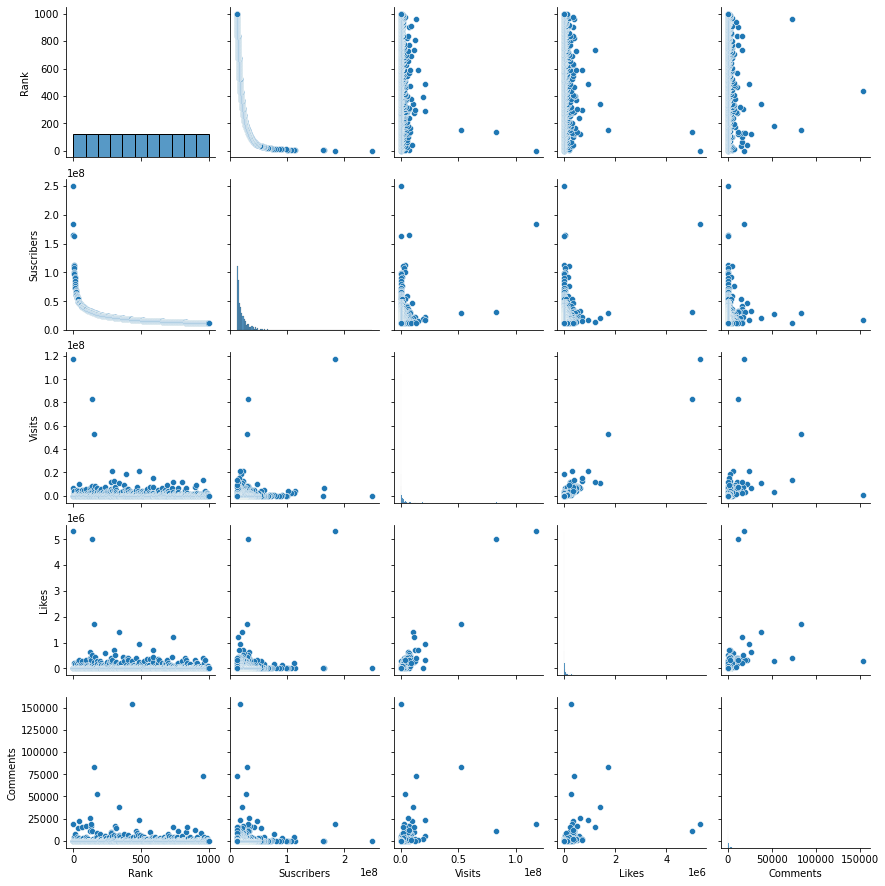

In [11]:
#comparing the correlation among features

sns.pairplot(yt)

<AxesSubplot:>

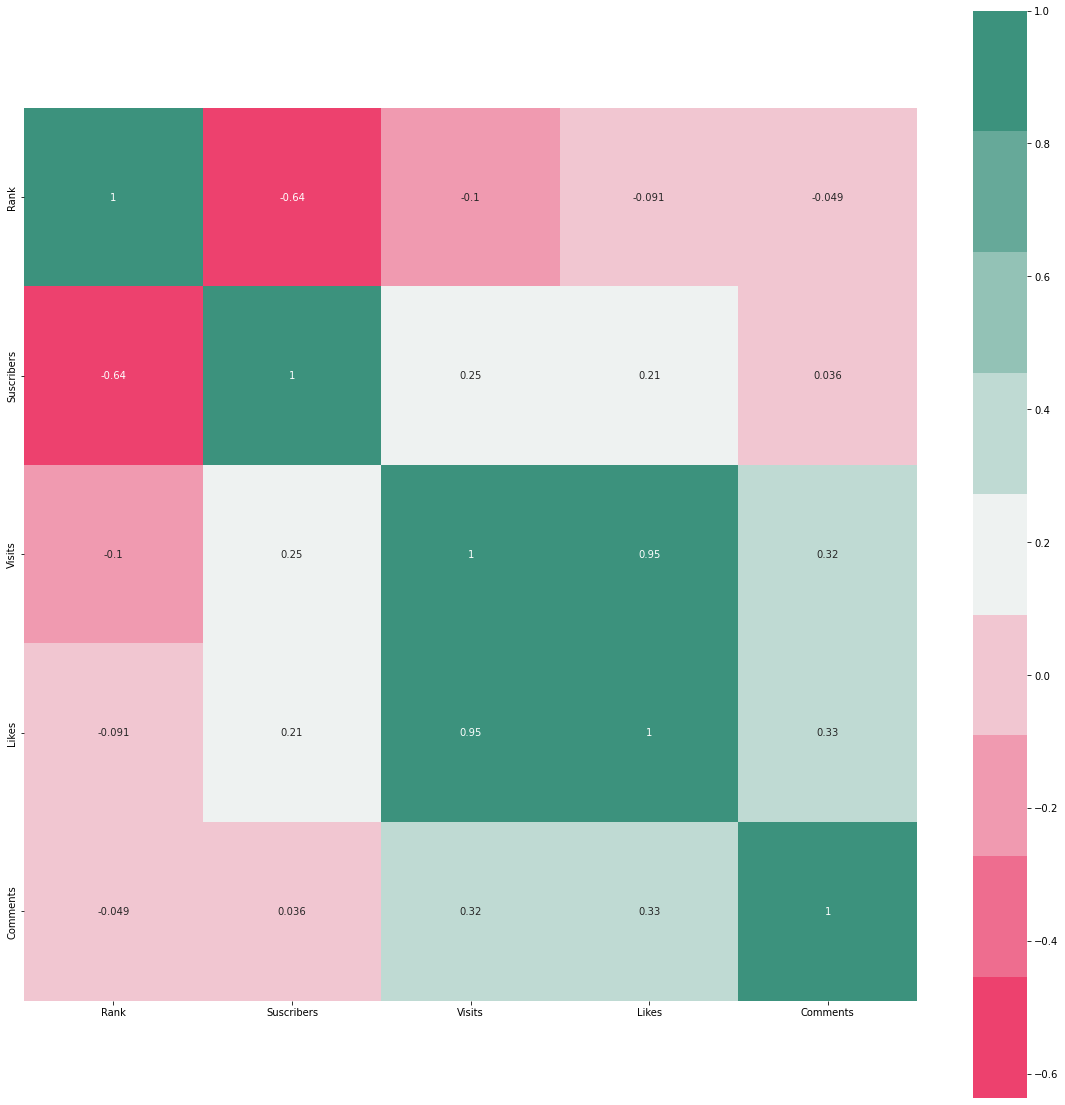

In [12]:
#checking for correlation among our features using heatmap to visualize

cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = yt.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [13]:
feature = ['Rank', 'Categories', 'Suscribers', 'Country', 'Visits', 'Likes', 'Comments']

In [14]:
enumerate(feature)

In [15]:
list(enumerate(feature))

[(0, 'Rank'),
 (1, 'Categories'),
 (2, 'Suscribers'),
 (3, 'Country'),
 (4, 'Visits'),
 (5, 'Likes'),
 (6, 'Comments')]

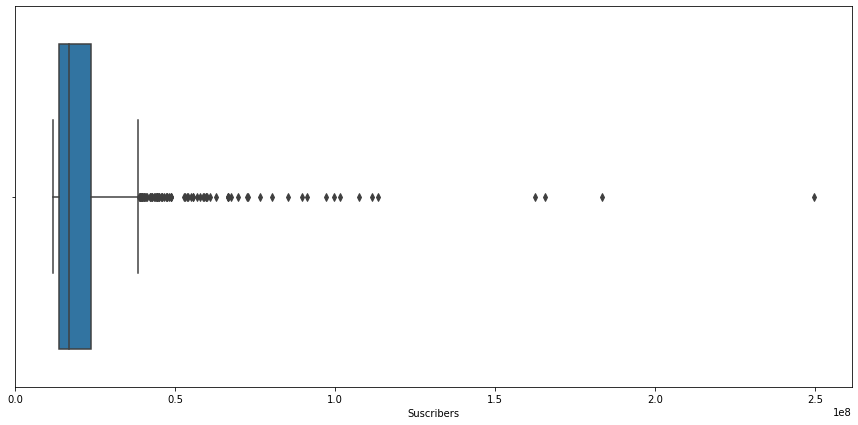

In [16]:
#checking for ouliers in subscribers column
plt.figure(figsize=(15,7))
sns.boxplot(x=yt['Suscribers'])
plt.show()

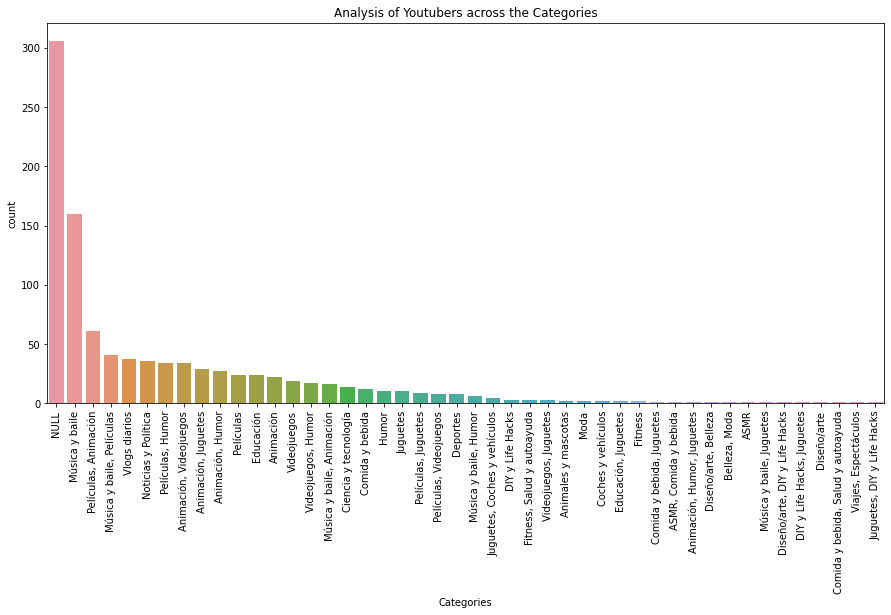

In [17]:
#to select some features and put them in a list
select_features = ['Categories', 'Suscribers', 'Visits', 'Likes', 'Comments']

#create a data frame with the selected features
df1 = yt[select_features]

plt.figure(figsize=(15,7))
sns.countplot(x='Categories', data=df1, order=df1['Categories'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Analysis of Youtubers across the Categories')
plt.show()


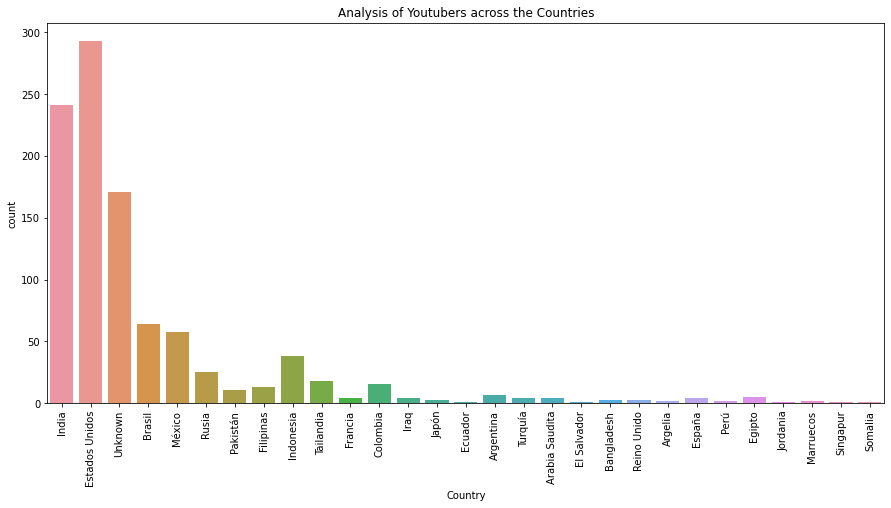

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='Country', data =yt).set(title='Country Suscribers')
plt.xticks(rotation=90)
plt.title('Analysis of Youtubers across the Countries')
plt.show()


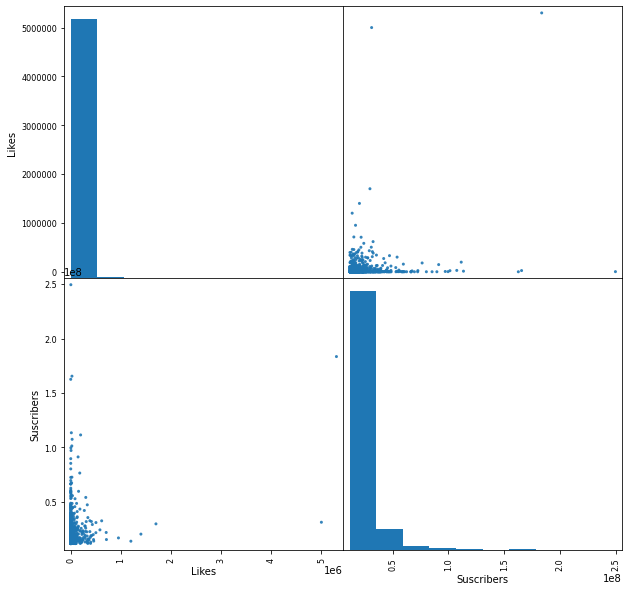

In [19]:
#What is the relationship between the number of likes,
#views, comments, and dislikes?


axes = pd.plotting.scatter_matrix(yt[['Likes','Suscribers']],
                           figsize=(10,10),
                           diagonal='hist',
                           alpha=0.9)


plt.show()

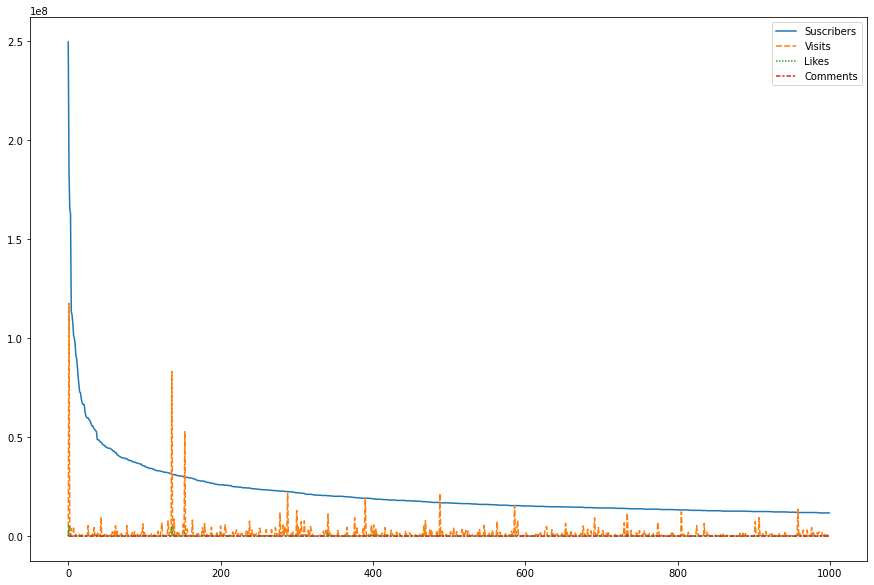

In [20]:
#visualizing using line plot 

plt.figure(figsize=(15,10))
sns.lineplot(data= df1)
plt.show()

In [21]:
# i want to check the average data of some of the features of the list

average_subscribers = df1['Suscribers'].mean()
average1 = average_subscribers

average_visits = df1['Visits'].mean()
average2 = average_visits

average_likes = df1['Likes'].mean()
average3 = average_likes

average_comments = df1['Comments'].mean()
average4 = average_comments

# Printing average of the list 
print("Average Subscribers =", round(average1, 2)) 
print("Average Visits =", round(average2, 2)) 
print("Average Likes =", round(average3, 2)) 
print("Average Comments =", round(average4, 2)) 


Average Subscribers = 21894400.0
Average Visits = 1209446.32
Average Likes = 53632.59
Average Comments = 1288.77


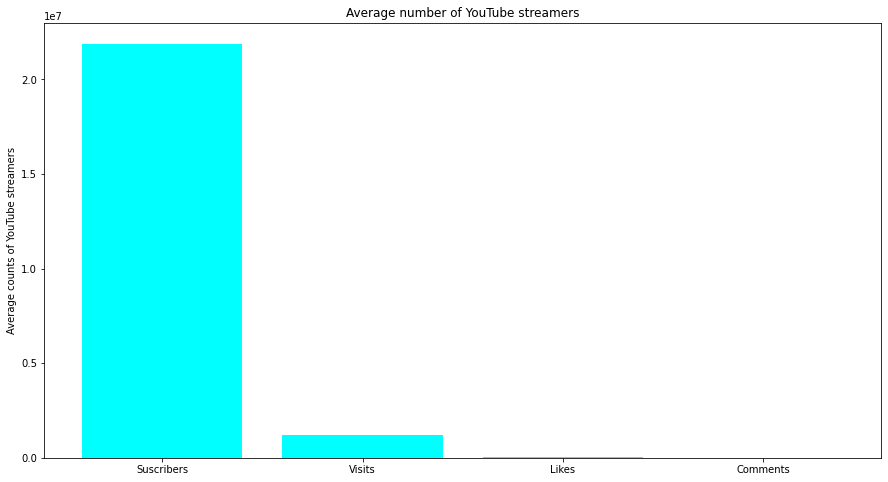

In [22]:
#checking the average number of streamers using bar chart

features = ['Suscribers', 'Visits', 'Likes', 'Comments']
average = [average1, average2, average3, average4]

plt.figure(figsize=(15,8))
plt.bar(features, average, color ='aqua')
plt.title('Average number of YouTube streamers')
plt.ylabel('Average counts of YouTube streamers')
plt.show()